# Task 2- KNN Algorithm
 using Scikit-learn 

In [1]:
# import Required liberary 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import confusion_matrix
# import data
import dataPrep as dp
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Read Data 
Data = pd.read_csv("Prostate_Cancer.csv")

# Data preparation 

In [3]:
# Delete id column as it is not affect the result 
Data.drop(['id'],axis=1,inplace=True)

In [4]:
# Encode the non numerical data
Data['diagnosis_result'] = LabelEncoder().fit_transform(Data['diagnosis_result'])
Data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,0,22,14,78,451,0.105,0.071,0.190,0.066
97,0,19,27,62,295,0.102,0.053,0.135,0.069
98,0,21,24,74,413,0.090,0.075,0.162,0.066


In [5]:
Data
# 0.064690
# 0.097000

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,0,22,14,78,451,0.105,0.071,0.190,0.066
97,0,19,27,62,295,0.102,0.053,0.135,0.069
98,0,21,24,74,413,0.090,0.075,0.162,0.066


### Imputation the outlires data


In [6]:
# smoothness
Data_filter = Data['smoothness']>0.13	
Data.loc[Data_filter,'smoothness']=0.102730

In [7]:
#compactness
Data_filter = Data['compactness']>0.26
Data.loc[Data_filter,'compactness']=0.126700

In [8]:
#perimeter
Data_filter = Data['perimeter']>160
Data.loc[Data_filter,'perimeter']=96.780000

In [9]:
#area
Data_filter = Data['area']>1750
Data.loc[Data_filter,'area']=702.880000

In [10]:
#symmetry
Data_filter = Data['symmetry']>0.26
Data.loc[Data_filter,'symmetry']=0.193170

In [11]:
#fractal_dimension
Data_filter = Data['fractal_dimension']>0.82
Data.loc[Data_filter,'fractal_dimension']=0.064690

# Model

### KNN

In [12]:
X = Data.drop(['diagnosis_result'],axis=1)
Y = Data['diagnosis_result']


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
k_scores = np.zeros(20)
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    k_scores[k-1]= knn.score(x_test,y_test)
    # print(str(k) + "Neighbors   score", str(k_scores[k-1]))

In [15]:
# best k
k_best = np.argmax(k_scores)
k_best

12

In [16]:
y_prediction = knn.predict(x_test)
cm = confusion_matrix(y_test,y_prediction)
cm

array([[ 3,  0],
       [ 2, 15]], dtype=int64)

In [17]:
# acc = (cm[0][0]+cm[1][1] )/ (cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
# acc
accu=accuracy_score(y_test,y_prediction)
accu

0.9

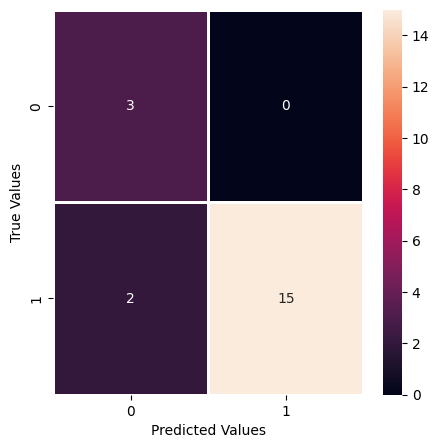

In [18]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_prediction)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=1,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### Radius Neighbors

In [19]:
Rk_score = np.zeros(10)
R = np.linspace(0.05,0.8,10)
for i in range(len(R)):
    R_knn = RadiusNeighborsClassifier(radius=R[i], outlier_label='most_frequent')
    R_knn.fit(x_train,y_train)
    Rk_score[i] = R_knn.score(x_test,y_test)
    # print(str(R[i]) + ",   score",str(Rk_score[i]))

In [20]:
R_best = R[np.argmax(Rk_score)]
R_best


0.05

In [21]:
yr_prediction = R_knn.predict(x_test)
cm_r = confusion_matrix(y_test,yr_prediction)
cm_r

array([[ 0,  3],
       [ 0, 17]], dtype=int64)

In [22]:
R_acc = (cm_r[0][0]+cm_r[1][1] )/ (cm_r[0][0]+cm_r[1][1]+cm_r[0][1]+cm_r[1][0])
R_acc

0.85

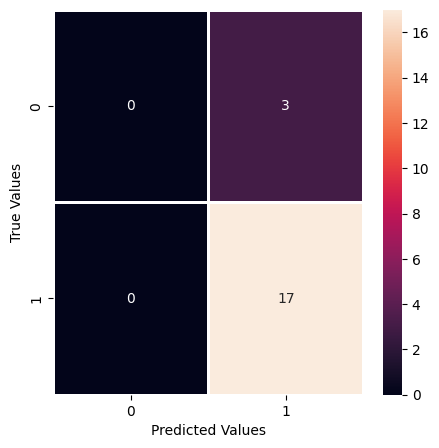

In [23]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,yr_prediction)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=1,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()